In [1]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
#!pip3 install dispy

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-thkv7m40
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-thkv7m40
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done
  Created wheel for pyFTS: filename=pyFTS-1.7-py3-none-any.whl size=219432 sha256=99311ccea9761564cf022bbcd51238479033acc350f4cc985715b746a12fd377
  Stored in directory: /tmp/pip-ephem-wheel-cache-wowaam0o/wheels/7f/25/75/dd8f713bf48592da71e0441c7abdc1f5aa4d9645a6b7ee99d4
Successfully built pyFTS


In [4]:
# 1. Import thư viện
import pandas as pd
import numpy as np
from pyFTS.partitioners import Grid
from pyFTS.models import chen
import matplotlib.pyplot as plt

In [5]:
# 2. Đọc file csv
df = pd.read_csv("NVL-Historical-Data.csv")
df1=df.reset_index()['Price']

In [6]:
# 3. Chia train test 7_3
train_size_7_3 = int(0.7 * len(df1))
test_size_7_3 = len(df1) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

In [7]:
# 3. Chia train test 8_2
train_size_8_2 = int(0.8 * len(df1))
test_size_8_2 = len(df1) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

In [8]:
# 3. Chia train test 9_1
train_size_9_1 = int(0.9 * len(df1))
test_size_9_1 = len(df1) - train_size_9_1

train_data_9_1= df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [9]:
train_data_7_3["Price"] = train_data_7_3["Price"].str.replace(',', '').astype(float)

<ipython-input-9-199276f39be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_7_3["Price"] = train_data_7_3["Price"].str.replace(',', '').astype(float)


In [10]:
train_data_8_2["Price"] = train_data_8_2["Price"].str.replace(',', '').astype(float)

<ipython-input-10-341c98d18afa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_8_2["Price"] = train_data_8_2["Price"].str.replace(',', '').astype(float)


In [11]:
train_data_9_1["Price"] = train_data_9_1["Price"].str.replace(',', '').astype(float)

<ipython-input-11-31b1c1e2a1f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_9_1["Price"] = train_data_9_1["Price"].str.replace(',', '').astype(float)


In [12]:
# 4. Xác định đặc trưng dữ liệu _7_3
train_features_7_3 = train_data_7_3["Price"].values
train_dates_7_3 = pd.to_datetime(train_data_7_3["Date"])

In [13]:
# 4. Xác định đặc trưng dữ liệu _8_2
train_features_8_2 = train_data_8_2["Price"].values
train_dates_8_2 = pd.to_datetime(train_data_8_2["Date"])

In [14]:
# 4. Xác định đặc trưng dữ liệu _9_1
train_features_9_1 = train_data_9_1["Price"].values
train_dates_9_1 = pd.to_datetime(train_data_9_1["Date"])

In [15]:
# 5. Xây dựng phân vùng mờ (Grid Partitioner) _7_3
partitioner_7_3 = Grid.GridPartitioner(data=train_features_7_3, npart=10)

In [16]:
# 5. Xây dựng phân vùng mờ (Grid Partitioner) _8_2
partitioner_8_2 = Grid.GridPartitioner(data=train_features_8_2, npart=10)

In [17]:
# 5. Xây dựng phân vùng mờ (Grid Partitioner) _9_1
partitioner_9_1 = Grid.GridPartitioner(data=train_features_9_1, npart=10)

In [18]:
# 6. Xây dựng mô hình FTS _7_3
model_7_3 = chen.ConventionalFTS(partitioner=partitioner_7_3)
model_7_3.fit(train_features_7_3)

In [19]:
# 6. Xây dựng mô hình FTS _8_2
model_8_2 = chen.ConventionalFTS(partitioner=partitioner_8_2)
model_8_2.fit(train_features_8_2)

In [20]:
# 6. Xây dựng mô hình FTS _9_1
model_9_1 = chen.ConventionalFTS(partitioner=partitioner_9_1)
model_9_1.fit(train_features_9_1)

In [21]:
test_data_7_3["Price"] = test_data_7_3["Price"].str.replace(',', '').astype(float)

<ipython-input-21-cbd801967388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_7_3["Price"] = test_data_7_3["Price"].str.replace(',', '').astype(float)


In [22]:
test_data_8_2["Price"] = test_data_8_2["Price"].str.replace(',', '').astype(float)

<ipython-input-22-599188965ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_8_2["Price"] = test_data_8_2["Price"].str.replace(',', '').astype(float)


In [23]:
test_data_9_1["Price"] = test_data_9_1["Price"].str.replace(',', '').astype(float)

<ipython-input-23-45a6da93fa28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_9_1["Price"] = test_data_9_1["Price"].str.replace(',', '').astype(float)


In [24]:
# 7. Dự đoán tập test dựa trên train _7_3
test_features_7_3 = test_data_7_3["Price"].values
test_dates_7_3 = pd.to_datetime(test_data_7_3["Date"])
test_predictions_7_3 = model_7_3.predict(test_features_7_3)

In [25]:
# 7. Dự đoán tập test dựa trên train _8_2
test_features_8_2 = test_data_8_2["Price"].values
test_dates_8_2 = pd.to_datetime(test_data_8_2["Date"])
test_predictions_8_2 = model_8_2.predict(test_features_8_2)

In [26]:
# 7. Dự đoán tập test dựa trên train _9_1
test_features_9_1 = test_data_9_1["Price"].values
test_dates_9_1 = pd.to_datetime(test_data_9_1["Date"])
test_predictions_9_1 = model_9_1.predict(test_features_9_1)

In [27]:
last_test_index_7_3 = len(test_features_7_3) - 1
next_30_days_predictions_7_3 = []

# Khởi tạo current_feature với toàn bộ test_features cuối cùng
current_feature_7_3 = test_features_7_3[last_test_index_7_3:last_test_index_7_3+1]

for _ in range(30):
    # Dự đoán tiếp theo dựa trên current_feature
    prediction_7_3 = model_7_3.forecast(current_feature_7_3)[0]

    # Thêm dự đoán vào danh sách next_30_days_predictions
    next_30_days_predictions_7_3.append(prediction_7_3)

    # Cập nhật current_feature để sử dụng toàn bộ chuỗi dự đoán trước đó
    current_feature_7_3 = np.append(current_feature_7_3, prediction_7_3)[1:]

fur_pre_7_3 = np.array(next_30_days_predictions_7_3)

In [28]:
last_test_index_8_2 = len(test_features_8_2) - 1
next_30_days_predictions_8_2 = []

# Khởi tạo current_feature với toàn bộ test_features cuối cùng
current_feature_8_2 = test_features_8_2[last_test_index_8_2:last_test_index_8_2+1]

for _ in range(30):
    # Dự đoán tiếp theo dựa trên current_feature
    prediction_8_2 = model_8_2.forecast(current_feature_8_2)[0]

    # Thêm dự đoán vào danh sách next_30_days_predictions
    next_30_days_predictions_8_2.append(prediction_8_2)

    # Cập nhật current_feature để sử dụng toàn bộ chuỗi dự đoán trước đó
    current_feature_8_2 = np.append(current_feature_8_2, prediction_8_2)[1:]

fur_pre_8_2 = np.array(next_30_days_predictions_8_2)

In [29]:
last_test_index_9_1 = len(test_features_9_1) - 1
next_30_days_predictions_9_1 = []

# Khởi tạo current_feature với toàn bộ test_features cuối cùng
current_feature_9_1 = test_features_9_1[last_test_index_9_1:last_test_index_9_1+1]

for _ in range(30):
    # Dự đoán tiếp theo dựa trên current_feature
    prediction_9_1 = model_9_1.forecast(current_feature_9_1)[0]

    # Thêm dự đoán vào danh sách next_30_days_predictions
    next_30_days_predictions_9_1.append(prediction_9_1)

    # Cập nhật current_feature để sử dụng toàn bộ chuỗi dự đoán trước đó
    current_feature_9_1 = np.append(current_feature_9_1, prediction_9_1)[1:]

fur_pre_9_1 = np.array(next_30_days_predictions_9_1)

In [30]:
# 10. Đánh giá độ chính xác thuật toán _7_3
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
test_mae_7_3 = mean_absolute_error(test_predictions_7_3, test_data_7_3['Price'])
test_mape_7_3 = mean_absolute_percentage_error(test_predictions_7_3, test_data_7_3['Price'])
test_rmse_7_3 = np.sqrt(np.mean((test_predictions_7_3 - test_data_7_3['Price'])**2))
print('Testing MAE:', test_mae_7_3)
print('Testing RMSE:', test_rmse_7_3)
print('Testing MAPE:', test_mape_7_3)

Testing MAE: 7630.8095164609085
Testing RMSE: 8928.019874168212
Testing MAPE: 0.26236294436782004


In [31]:
# 10. Đánh giá độ chính xác thuật toán _8_2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
test_mae_8_2 = mean_absolute_error(test_predictions_8_2, test_data_8_2['Price'])
test_mape_8_2 = mean_absolute_percentage_error(test_predictions_8_2, test_data_8_2['Price'])
test_rmse_8_2 = np.sqrt(np.mean((test_predictions_8_2 - test_data_8_2['Price'])**2))
print('Testing MAE:', test_mae_8_2)
print('Testing RMSE:', test_rmse_8_2)
print('Testing MAPE:', test_mape_8_2)

Testing MAE: 10187.31086419753
Testing RMSE: 10721.084594636048
Testing MAPE: 0.3779822731490525


In [32]:
# 10. Đánh giá độ chính xác thuật toán _9_1
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
test_mae_9_1 = mean_absolute_error(test_predictions_9_1, test_data_9_1['Price'])
test_mape_9_1 = mean_absolute_percentage_error(test_predictions_9_1, test_data_9_1['Price'])
test_rmse_9_1 = np.sqrt(np.mean((test_predictions_9_1 - test_data_9_1['Price'])**2))
print('Testing MAE:', test_mae_9_1)
print('Testing RMSE:', test_rmse_9_1)
print('Testing MAPE:', test_mape_9_1)

Testing MAE: 2408.614320987655
Testing RMSE: 2737.4624437989796
Testing MAPE: 0.12498607472115073


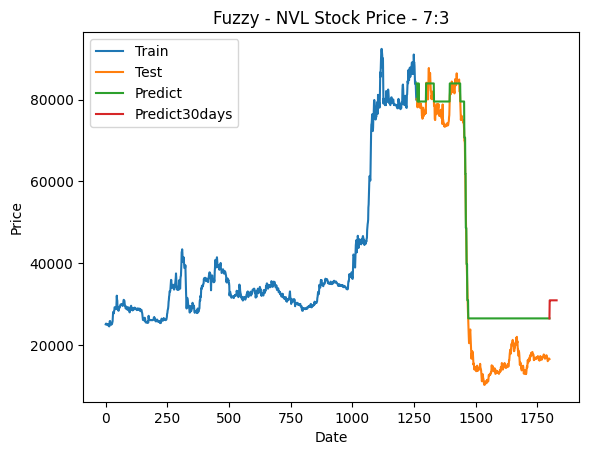

In [34]:
# 11.Vẽ hình _7_3
import matplotlib.pyplot as plt
train_data_index_7_3 = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot((train_data_7_3['Price']))

test_data_index_7_3 = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index_7_3,(test_data_7_3['Price']))

test_data_index_7_3 = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index_7_3,(test_predictions_7_3))

fur_pre_index_7_3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(fur_pre_index_7_3,(fur_pre_7_3))
plt.title('Fuzzy - NVL Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

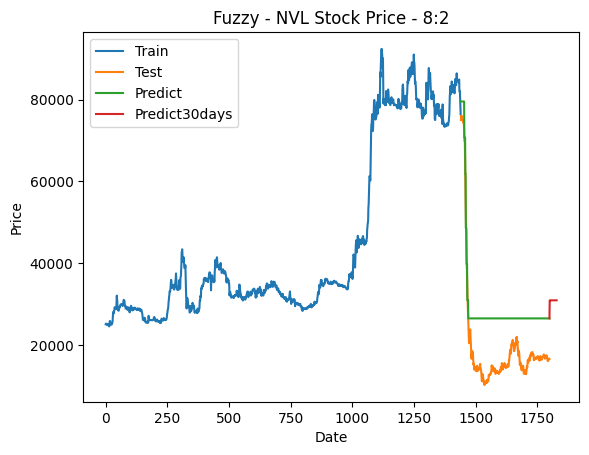

In [35]:
# 11.Vẽ hình _8_2
import matplotlib.pyplot as plt
train_data_index_8_2 = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot((train_data_8_2['Price']))

test_data_index_8_2 = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index_8_2,(test_data_8_2['Price']))

test_data_index_8_2 = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index_8_2,(test_predictions_8_2))

fur_pre_index_8_2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(fur_pre_index_8_2,(fur_pre_8_2))
plt.title('Fuzzy - NVL Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

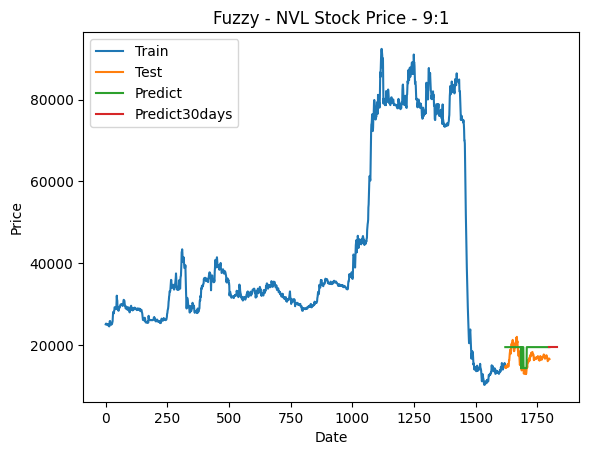

In [36]:
# 11.Vẽ hình _9_1
import matplotlib.pyplot as plt
train_data_index_9_1 = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot((train_data_9_1['Price']))

test_data_index_9_1 = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index_9_1,(test_data_9_1['Price']))

test_data_index_9_1 = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index_9_1,(test_predictions_9_1))

fur_pre_index_9_1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(fur_pre_index_9_1,(fur_pre_9_1))
plt.title('Fuzzy - NVL Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()